<a href="https://colab.research.google.com/github/kayeekim/kayeekim.github.io/blob/master/_code_practice/%EC%8B%A4%EB%AC%B4%EC%97%90_%ED%99%9C%EC%9A%A9%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_11_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 실무에 활용하는 머신러닝

http://www.kocw.net/home/cview.do?mty=p&kemId=1380150

## 군집화 알고리즘 활용 실습(1)
### K-means 알고리즘 기초 실습

In [13]:
#from google.colab import drive
#drive.mount('/gdrive')
#filename = '/gdrive/My Drive/kmeans.csv'

## 강의 데이터 대신 iris 데이터로 대체.

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load data
from sklearn.datasets import load_iris

iris = load_iris()
#iris
data = iris.data[:,[0,1]]
print(data[:10])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]


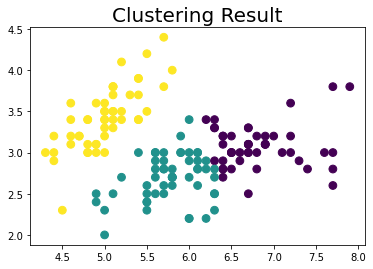

In [15]:
# Clustering 수행 및 시각화
kmeans_iris = KMeans(n_clusters=3).fit(data)

labels = kmeans_iris.labels_
plt.title('Clustering Result', fontsize=20)
plt.scatter(data[:,0], data[:,1], c=labels, s=60)

In [16]:
# 분류 정확도 확인
target = iris.target # iris dataset에서 제공하는 target값. 
df = pd.DataFrame({'labels': labels, 'target': target})
ct = pd.crosstab(df['labels'], df['target'])
ct

target,0,1,2
labels,,,
0,0,12,35
1,0,38,15
2,50,0,0


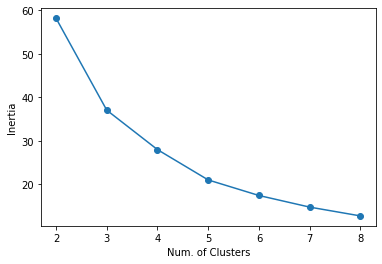

In [17]:
# 최적의 k값 찾기 
"""
그룹에 포함된 데이터들이 퍼져있는 정도를 inertia 라고 하는데, 
Inertia는 각 클러스터의 중심인 centroid와 각 데이터들 사이의 거리를 나타냅니다. 
즉, Inertia가 낮은 그룹을 ‘좋은’ 그룹이라 할 수 있고, 이러한 그룹을 적게 만들수록 좋은 모델이라고 할 수 있습니다.

출처: https://eunsukimme.github.io/ml/2019/12/16/K-Means/
"""
num_clusters = list(range(2, 9))
inertias = []

for i in num_clusters:
  model = KMeans(n_clusters=i)
  model.fit(data)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Num. of Clusters')
plt.ylabel('Inertia')
plt.show()

## 군집화 알고리즘 활용 실습(2)
### Hierarchical Clustering 알고리즘 기초 실습

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# Load Data & Preprocessing
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data = pd.concat([data,labels],axis=1)
data.head()

,0,1,2,3,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


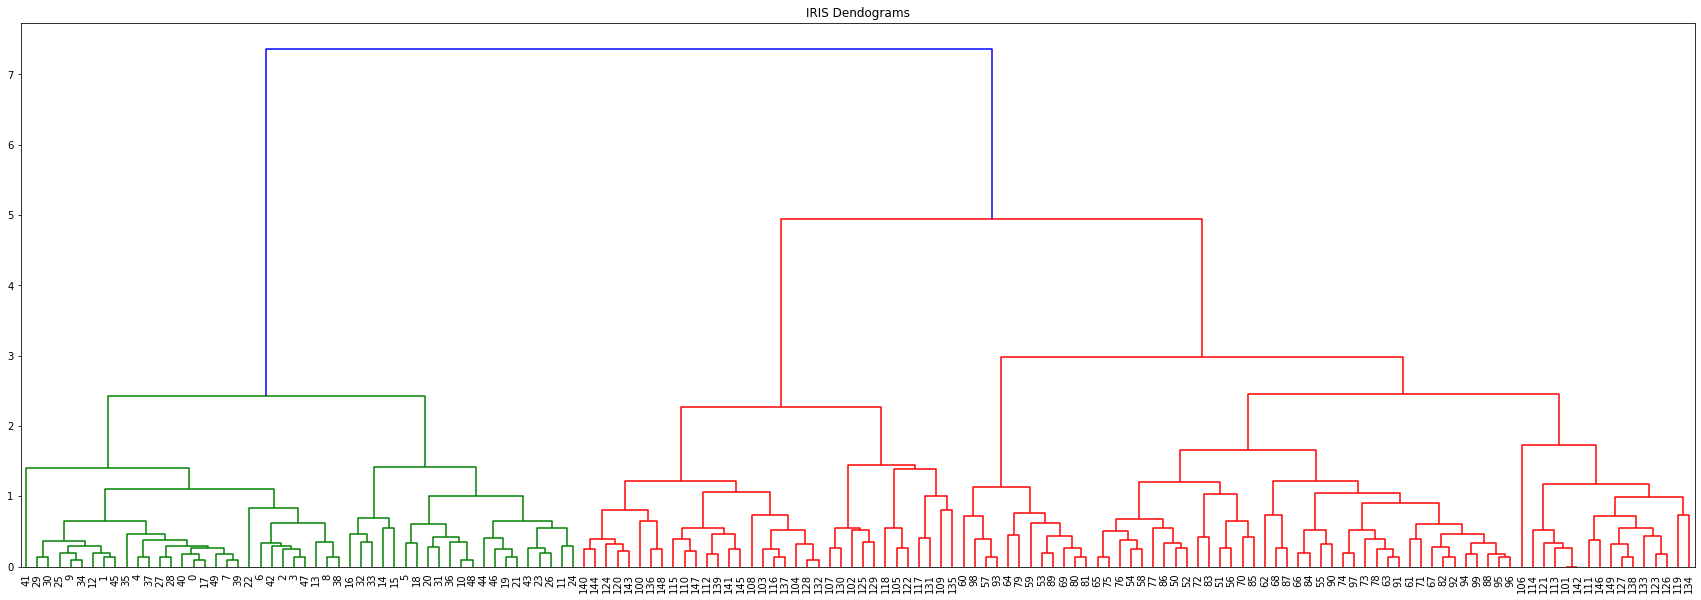

In [20]:
# Clustering 수행
merge = linkage(data, method='complete')

plt.figure(figsize=(30,10))
plt.title("IRIS Dendograms")

dendrogram(merge,
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()

In [21]:
# Cluster 자르기
cut = fcluster(merge, t=3, criterion='distance')
cut

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [26]:
# 분류 결과 확인
labels = data['labels']
print(labels.head(n=10))

df = pd.DataFrame({'predict':cut, 'labels':labels})
display(df)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: labels, dtype: int64


,predict,labels
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
145,2,2
146,3,2
147,2,2
148,2,2


In [28]:
# 분류 결과 확인 
ct = pd.crosstab(df['predict'], df['labels'])
ct

labels,0,1,2
predict,,,
1,50,0,0
2,0,0,34
3,0,50,16
